# Проверка гипотезы в Python и составление аналитической записки. Яндекс.Книги

Команда сервиса Яндекс Книги изучила данные, полученные при анализе LTV, и выдвинула гипотезу. Она заключается в том, что пользователи, которые приносят больший LTV, являются более лояльными, а значит, проводят в среднем больше времени за чтением и прослушиванием книг в приложении.

Команда предлагает сравнить пользователей из Санкт-Петербурга и Москвы, ведь при расчётах среднего LTV было определено, что эта метрика у петербуржцев выше. 

## Цели и задачи проекта

Проверить гипотезу о том, что пользователи из Санкт-Петербурга проводят больше времени в сервисе Яндекс.Книги за чтением или прослушиванием книг, чем пользователи из Москвы. 


## Описание данных

Предварительно помощью SQL выгружены записи о действиях пользователей из Москвы и Санкт-Петербурга и рассчитана их активность, то есть сумма часов:

- city — город пользователя;

- puid — идентификатор пользователя;

- hours — общее количество часов активности.

## Содержание 

Проверка гипотезы для Яндекс.Книги

1. Загрузка и предобработка данных

2. Проверка гипотезы

3. Интерпретация результатов

4. Выводы




---

## 1. Загрузка данных и знакомство с ними


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


Загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [4]:
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


Датасет состоит из 8784 строк и 4 столбцов. При этом один из столбцов дублирует индекс. Типы данных и содержание соответствуют описанию. Пропуски отсутствуют.

In [5]:
#Удалим лишний столбец
df = df.drop('Unnamed: 0', axis=1)

Проверим наличие дубликатов в идентификаторах пользователей.

In [6]:
df['puid'].duplicated().sum()

244

In [7]:
df[df['puid'].duplicated(keep=False)].sort_values(by='puid')

,city,puid,hours
35,Москва,2637041,10.317371
6247,Санкт-Петербург,2637041,3.883926
134,Москва,9979490,32.415573
6274,Санкт-Петербург,9979490,1.302997
145,Москва,10597984,42.931506
...,...,...,...
6195,Москва,1130000020425037,0.310556
8775,Санкт-Петербург,1130000023864516,14.384722
6202,Москва,1130000023864516,142.830085
6210,Москва,1130000028554332,11.277554


Похоже, что все или часть найденных дубликатов объясняются тем, что некоторые пользователи открывали приложение в обоих городах. Проверим дубликаты по сочетанию города и идентификатора пользователя.

In [8]:
df.duplicated(subset=['city','puid']).sum()

0

Действительно, все повторяющиеся значения в столбце puid - это пользователи, которые заходили в приложение и в Москве, и в Санкт-Петербурге. 

Для выполнения условия о независимости выборок удалим этих пользователей. 

In [9]:
df.drop_duplicates('puid',keep=False, inplace=True)

In [10]:
df['puid'].duplicated().sum()

0

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [11]:
msk_hours=df[df['city']=='Москва']['hours']
spb_hours=df[df['city']=='Санкт-Петербург']['hours']


In [12]:
print(f'Москва: Среднее количество часов - {round(msk_hours.mean(),2)}, стандартное отклонение {msk_hours.std():.2f}')
print(f'Санкт-Петербург: Среднее количество часов - {round(spb_hours.mean(),2)}, стандартное отклонение {spb_hours.std():.2f}')

Москва: Среднее количество часов - 10.85, стандартное отклонение 36.93
Санкт-Петербург: Среднее количество часов - 11.26, стандартное отклонение 39.83


Проверим распределения данных по Москве и СПб. 

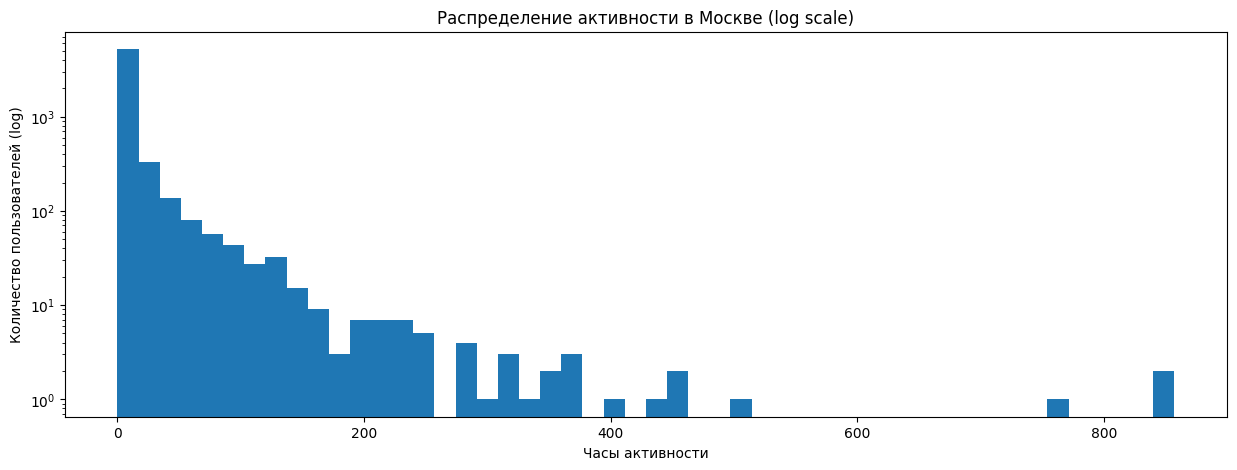

In [13]:
msk_hours.plot(
    kind='hist',
    bins=50,
    figsize=(15,5),
    logy=True
)

plt.xlabel('Часы активности')
plt.ylabel('Количество пользователей (log)')
plt.title('Распределение активности в Москве (log scale)')
plt.show()

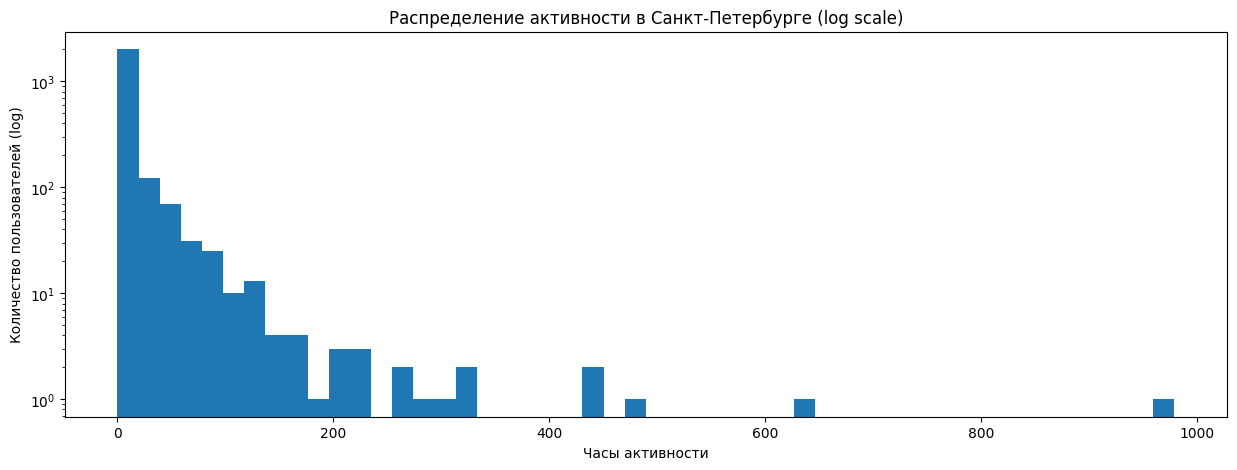

In [14]:
spb_hours.plot(
    kind='hist',
    bins=50,
    figsize=(15,5),
    logy=True
)

plt.xlabel('Часы активности')
plt.ylabel('Количество пользователей (log)')
plt.title('Распределение активности в Санкт-Петербурге (log scale)')
plt.show()


Распределения не являются нормальными, поэтому Т-тест Уэлча не подойдет для проверки гипотезы. Воспользуемся тестом Манна-Уитни.

In [15]:
alpha = 0.05
stat_mw, p_value_mw = mannwhitneyu(
    spb_hours, 
    msk_hours, 
    alternative='greater' )


if p_value_mw <alpha:
    print(f"p_value_mw={round(p_value_mw,6)}<{alpha}. Отвергаем H₀: Средняя активность в СПб статистически значимо больше, чем в Москве")
else:
    print(f"p_value_mw={round(p_value_mw,6)}>{alpha}.Не отвергаем H₀: Нет статистически значимых различий в активности")

p_value_mw=0.453227>0.05.Не отвергаем H₀: Нет статистически значимых различий в активности


## 3. Аналитическая записка

Для проверки статистической значимости был выбран тест Манна-Уитни, поскольку распределения не нормальные, уровень значимости 0.05 выбран как общепринятый стандарт в статистических исследованиях, представляющий разумный компромисс между риском ложного обнаружения различий (ошибка I рода) и вероятностью пропустить реальный эффект (ошибка II рода). 

На уровне значимости alpha = 0.05 нет статистически значимых доказательств того, что пользователи из Санкт-Петербурга проводят больше времени в приложении, чем пользователи из Москвы (p = 0.089). Хотя наблюдается тенденция к более высокой активности в Санкт-Петербурге, эта разница не достигает порога статистической значимости. Таким образом, исходная гипотеза о том, что пользователи из Санкт-Петербурга проводят больше времени в приложении, не нашла статистического подтверждения на текущей выборке данных.

Более высокое среднее значение продолжительности прослушивания пользователями из СПб может объясняться присутствием выбросов и их увеличенной долей по сравнению с Москвой. 

Разные размеры выборок (СПб: 2550, Москва: 6234) могли повлиять на мощность теста. Для обнаружения слабых эффектов может потребоваться больший объем данных.

## 4. Выводы

На основании статистического анализа не подтверждена гипотеза о значимом различии времени использования приложения между пользователями Москвы и Санкт-Петербурга. 

Возможными причинами являются наличие выбросов в данных и разница в размерах выборок, что могло снизить чувствительность теста. 

Для окончательных выводов рекомендуется увеличить объем данных или провести дополнительный анализ с учетом выбросов.